* Pide el nombre del archivo
* Lee image plane (x0,y0,z0), punto a donde observa la cámara (xc,yc,zc) y distancia focal f
* Lee el numero de vertices y bordes en el objeto
* Lee las coordenadas de cada vertices
* Lee la lista de los vertices que estan conectados entre sí
* Renderiza la imagen

In [37]:
def pinhole_camera(vertices, edges, image_plane, camera_point, focal_length):
    # Convertir los vértices a coordenadas de la cámara
    vertices_camera = vertices - camera_point

    # Proyectar los vértices sobre el plano de la imagen
    projected_vertices = vertices_camera * focal_length / vertices_camera[:, 2][:, None]
    # Normalizar las coordenadas de la imagen al rango de píxeles
    normalized_vertices = projected_vertices[:, :] + np.asarray(image_plane) / 2

    # Crear una matriz de imagen
    image = np.zeros((int(image_plane[1]), int(image_plane[0])))

    # Dibujar los bordes
    for edge in edges:
        start = normalized_vertices[edge[0] - 1]
        end = normalized_vertices[edge[1] - 1]
        plt.plot([start[0], end[0]], [start[1], end[1]])

    plt.gca().invert_yaxis()  # Invertir el eje y para que la imagen esté orientada correctamente
    plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Entrada de datos
archivo = input("Ingrese el nombre del archivo: ")
x0, y0, z0 = map(float, input("Ingrese las coordenadas del plano de la imagen (x0 y0 z0): ").split())
xc, yc, zc = map(float, input("Ingrese las coordenadas del punto de la cámara (xc yc zc): ").split())
f = float(input("Ingrese la distancia focal: "))
num_vertices = int(input("Ingrese el número de vértices: "))

vertices = []
for i in range(num_vertices):
    vertex = list(map(float, input(f"Ingrese las coordenadas del vértice {i+1}: ").split()))
    vertices.append(vertex)
vertices = np.array(vertices)

num_edges = int(input("Ingrese el número de bordes: "))

edges = []
for i in range(num_edges):
    edge = list(map(int, input(f"Ingrese los vértices conectados por el borde {i+1}: ").split()))
    edges.append(edge)

# Renderizar la imagen
pinhole_camera(vertices, edges, (x0, y0, z0), (xc, yc, zc), f)


/tmp/ipykernel_13778/154726371.py:9: RuntimeWarning: divide by zero encountered in divide
  projected_vertices = vertices_camera * focal_length / vertices_camera[:, 2][:, None]
/tmp/ipykernel_13778/154726371.py:9: RuntimeWarning: invalid value encountered in divide
  projected_vertices = vertices_camera * focal_length / vertices_camera[:, 2][:, None]


TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

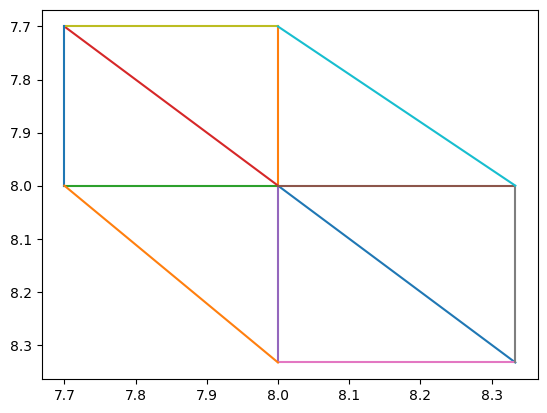

In [52]:
pinhole_camera(vertices, edges, (x0, y0, z0), (10,10,10), 3)

# Open3d

In [75]:
# TODO: verificar el teselado, ver como es posible crear o de que tamaño generar la esfera para tomar un punto de vista aleatorio, 
# adicional ver si es posible generar el render sin la necesidad de tener una textura 
# buscar hacerlo interactivo 

In [1]:
import os
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
from symlink import symbolic_dir
from tesselation import hinter_sampling

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
fov = 20
img_H = 100
img_W = 100
up = [0, 1, 0] #ortogonal vector between eye and center #verify
cent = [0,0,0] # where the camera see's 
eye = [0.5,0.2,0.0] #Where the camera is

In [3]:
print("Ingresa la dirección a la carpeta contenedora del banco de datos")
direccion = input("Cúal es la dirección a la carpeta contenedora?:") # Dataset acces
#print(list(filter(os.path.isdir, os.listdir(direccion))))
carpeta = input("A que carpeta quieres acceder?: ") #object folder
dir_carpeta = '../../ProyectoPHD/' + direccion + carpeta
if os.path.lexists(dir_carpeta + "/meshes/texture.png") == False:
    symbolic_dir(dir_carpeta)
    RGB = "/RGB"
    Depth = "/Depth"
    Point_cloud = "/Point_cloud"
    os.mkdir(dir_carpeta + RGB)
    os.mkdir(dir_carpeta + Depth)
    os.mkdir(dir_carpeta + Point_cloud)
    #print("Cree link simbolico")

Ingresa la dirección a la carpeta contenedora del banco de datos


In [4]:
cube = o3d.io.read_triangle_mesh( dir_carpeta + '/meshes/model.obj', True)
cube = o3d.t.geometry.TriangleMesh.from_legacy(cube)
material = o3d.visualization.rendering.MaterialRecord() # Create material
material.albedo_img = o3d.io.read_image(dir_carpeta + '/meshes/texture.png') # Add texture
cube.translate([0,0,0]) # translate to world CF origin

TriangleMesh on CPU:0 [4303 vertices (Float32) and 8362 triangles (Int64)].
Vertex Attributes: normals (dtype = Float32, shape = {4303, 3}).
Triangle Attributes: texture_uvs (dtype = Float32, shape = {8362, 3, 2}).

In [5]:
# Create a scene and add the triangle mesh
render = o3d.visualization.rendering.OffscreenRenderer(width=img_W, height=img_H) #Linux only
render.scene.add_geometry(name = 'cube', geometry = cube, material = material)

[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x60353b0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)


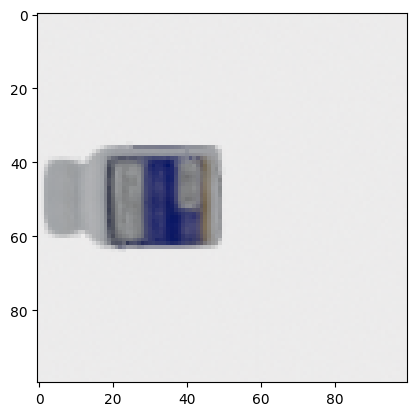

In [6]:
# Camera setup also could be possible with the extrinsic and extrinsinc matrices 
render.setup_camera(fov,cent,eye,up) #set the camera for capture
img = render.render_to_image() # render RGB image
plt.imshow(img)

# Pruebas

In [67]:
x = np.asarray(cube.get_oriented_bounding_box())

In [71]:
cube.get_center().numpy()

array([0.00071825, 0.00016994, 0.04763809], dtype=float32)

In [55]:
points,_ = hinter_sampling(1000, radius=3.0)

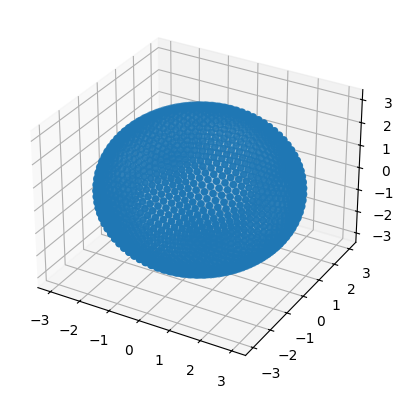

In [56]:
pp.figure().add_subplot(111, projection='3d').scatter(points[:,0], points[:,1], points[:,2])
pp.show()